## Import Libraries

In [37]:
import pandas as pd
import io
from google.colab import files
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

In [2]:
upload = files.upload()

Saving 33 - LifeExpectancy.csv to 33 - LifeExpectancy.csv


In [3]:
life_expectancy_data = pd.read_csv('33 - LifeExpectancy.csv', index_col=[0])
pd.set_option('display.max_columns', None)
life_expectancy_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Linear Regression

### Preprocessing


The Linear Regresion model is not compatible w missing values or categorical variables

### Missing Value

In [4]:
life_expectancy_data.isna().sum().sort_values(ascending=False)

population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
thinness_5_9_years                  34
thinness__1_19_years                34
bmi                                 34
polio                               19
diphtheria                          19
life_expectancy                     10
adult_mortality                     10
hiv_aids                             0
country                              0
year                                 0
measles                              0
percentage_expenditure               0
infant_deaths                        0
status                               0
under_five_deaths                    0
dtype: int64

### Category Types

In [5]:
# Put the categorical variables into category type
categorical_columns = list(life_expectancy_data.dtypes[life_expectancy_data.dtypes == 'O'].index.values)

for column in categorical_columns :
  life_expectancy_data[column] = life_expectancy_data[column].astype('category')

In [6]:
X = life_expectancy_data.loc[:,life_expectancy_data.columns != 'life_expectancy']
y = life_expectancy_data['life_expectancy']

X.shape , y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Applying preprocessing

In [7]:
def minimum_preprocessing(X, y) :
  print('Original Size:{}'.format(X.shape))
  categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
  # Remove categorical variables
  X = X.drop(columns=categorical_columns)
  # Remove missing values
  X = X.dropna()
  y = y[X.index]
  return X,y

#### Using this to train the model

In [8]:
X_train, y_train = minimum_preprocessing(X_train, y_train)
X_test, y_test = minimum_preprocessing(X_test, y_test)

Original Size:(2350, 21)
Original Size:(588, 21)


#### Linear Regressiong w scikitlearn library

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [10]:
y_train.head(8)

456     72.3
2667    74.9
1987    59.6
790     75.3
1727    64.0
2051    74.7
798     74.4
2252    65.6
Name: life_expectancy, dtype: float64

In [11]:
  y_pred_df = pd.DataFrame(y_pred)
  y_pred_df.head(8)

,0
0,69.548381
1,76.487140
2,61.355707
3,72.943350
4,68.334660
5,76.430838
6,72.419178
7,66.171982


In [12]:
w = lr.coef_
intercept = lr.intercept_
print(w)
print('\n', intercept)

[-1.38130425e-01 -1.68137261e-02  8.95419239e-02 -1.01106026e-01
  3.66786665e-04 -3.80517678e-03 -1.44655259e-05  2.71260238e-02
 -6.62910490e-02  3.74207210e-04  5.44348241e-02  1.57491915e-02
 -4.41238832e-01  1.82328632e-05 -2.04692277e-09 -1.05926647e-02
 -7.30700914e-02  1.05925419e+01  9.29135941e-01]

 330.60714874166376


### In statsmodel, Linear Regression is also called the ordinary least squares (OLS)

In [13]:
model = sm.OLS(y_train,sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     343.6
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        15:46:35   Log-Likelihood:                -3585.0
No. Observations:                1327   AIC:                             7210.
Df Residuals:                    1307   BIC:                             7314.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             330.6071     52.656      6.279      0.000     227.308     433.907
year                               -0.1381      0.026     -5.253      0.000      -0.190      -0.087
adult_mortality                    -0.0168      0.001    -15.920      0.000      -0.019      -0.015
infant_deaths                       0.0895      0.012      7.292      0.000       0.065       0.114
alcohol                            -0.1011      0.036     -2.802      0.005      -0.172      -0.030
percentage_expenditure              0.0004      0.000      1.600      0.110   -8.29e-05       0.001
hepatitis_b                        -0.0038      0.005     -0.747      0.455      -0.014       0.006
measles                         -1.447e-05    1.3e-05     -1.110      0.267      -4e-05    1.11e-05
bmi                                 0.0271      0.007      3.956      0.000       0.014       0.041
under_five_deaths                  -0.0663      0.009     -7.495      0.000      -0.084      -0.049
polio                               0.0004      0.006      0.065      0.948      -0.011       0.012
total_expenditure                   0.0544      0.046      1.180      0.238      -0.036       0.145
diphtheria                          0.0157      0.007      2.382      0.017       0.003       0.029
hiv_aids                           -0.4412      0.019    -22.858      0.000      -0.479      -0.403
gdp                              1.823e-05   3.65e-05      0.499      0.618   -5.35e-05    8.99e-05
population                      -2.047e-09   2.11e-09     -0.970      0.332   -6.19e-09    2.09e-09
thinness__1_19_years               -0.0106      0.059     -0.179      0.858      -0.127       0.105
thinness_5_9_years                 -0.0731      0.059     -1.245      0.213      -0.188       0.042
income_composition_of_resources    10.5925      0.949     11.157      0.000       8.730      12.455
schooling                           0.9291      0.068     13.667      0.000       0.796       1.063
==============================================================================
Omnibus:                       28.955   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.051
Skew:                          -0.119   Prob(JB):                     1.83e-12
Kurtosis:                       3.960   Cond. No.                     3.40e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis the model

One way to plot the residuals of the training data and verify that they follow a Gaussian distribution since it is out initial assumption

<ipython-input-14-6ef09668f7ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, bins=30)


<Axes: ylabel='Density'>

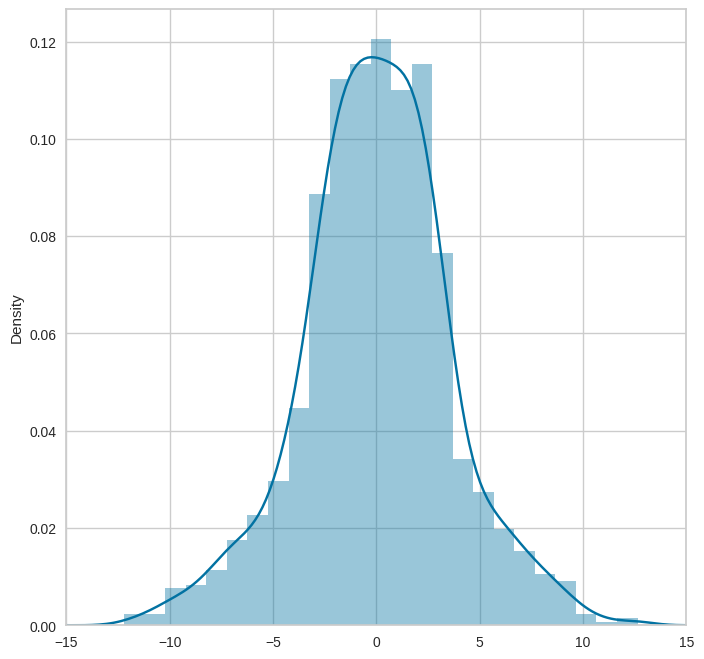

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-15,15])
sns.distplot(result.resid, bins=30)

((array([-3.27828194, -3.01912039, -2.87487754, ...,  2.87487754,
          3.01912039,  3.27828194]),
  array([-17.16568506, -12.05337634, -11.37664581, ...,  11.06191228,
          12.45808171,  12.63380439])),
 (3.59463564855317, 3.882733494351159e-11, 0.9946411607235319))

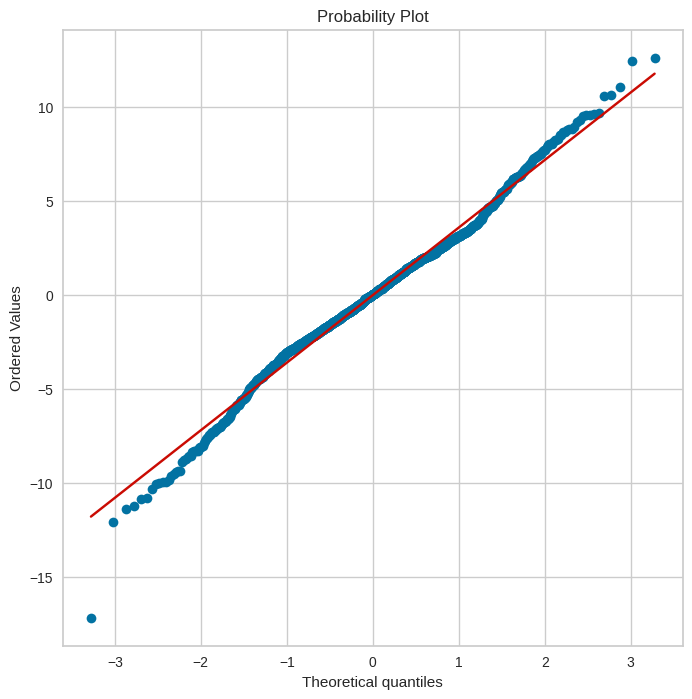

In [15]:
# Probability Plot is a graphical technique for assessing whether or not a dataset follow a given distribution
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid, plot=plt)

Another way is QQ-Plot which is a graphical technique for determining if 2 datasets come from  populations w a common distribution

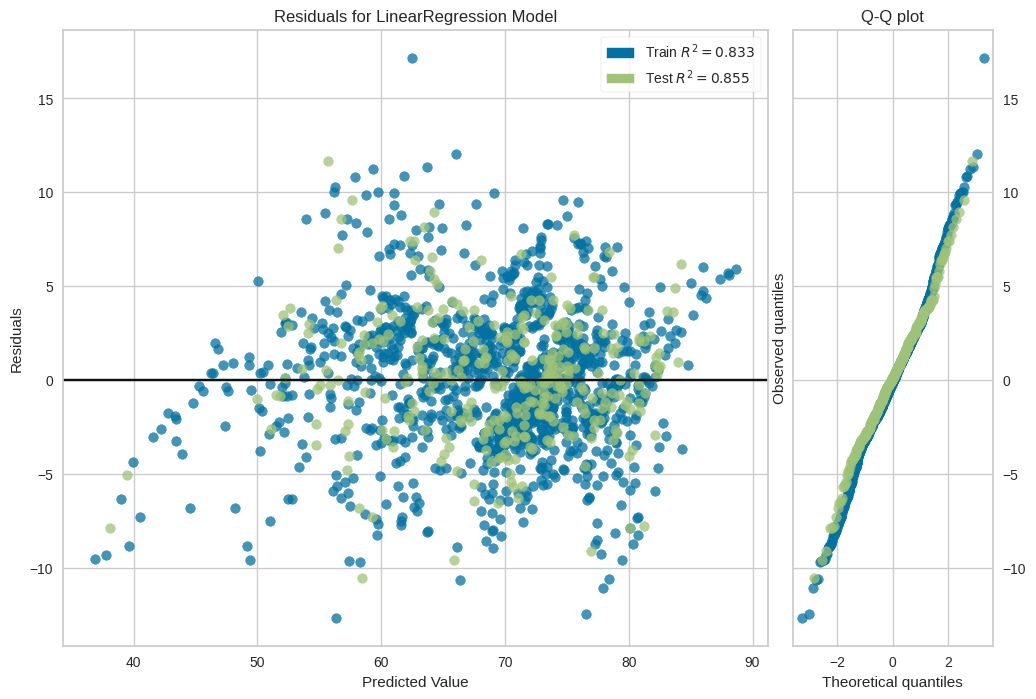

In [16]:
 plt.figure(figsize=(12,8))
 viz = residuals_plot(lr, X_train, y_train, X_test, y_test,is_fitted=True,qqplot=True, hist=False)

## Visualize Predictions w respect to Actual Values

Now we will plot the predictions against actual values and see how much they deviate from the ideal prediction


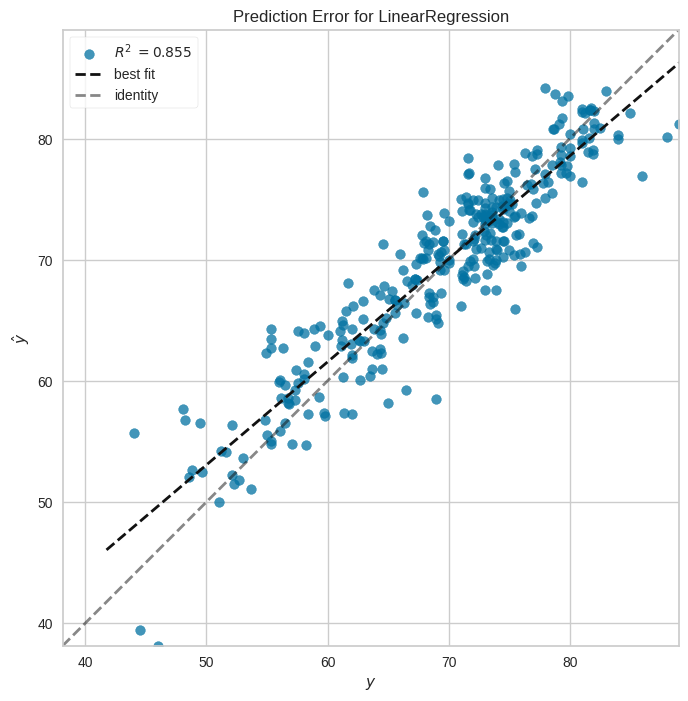

In [17]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr,X_test, y_test, is_fitted=True)

### Normalized Mean Square Error

nMSE is a way to optimize the model
MSE = (1/n) * Σ(y_i - y_hat_i)^2

NMSE = MSE / σ^2

With σ is variance which is calculated : Variance = (1/n) * Σ(x_i - μ)^2

The best possible result would be an Normalized MSE of 0, which would mean a perfect prediction

In [28]:
# Calculated the MSE
N = X_train.shape[0]
# using statmodels
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train-prediction)**2)/N
# using scikit-learn
mean_square_error_sk = mean_squared_error(y_train, prediction)
mean_square_error , mean_square_error_sk

(13.004457513160384, 13.004457513160384)

In [29]:
# Calculated the NMSE
norm_mse = np.sum((y_train-prediction)**2)/((N)*np.var(y_train))
norm_mse

0.16680930861224347

We could see that the NMSE of the model is 0.166, which is a close number to 0, so this is a good model that we can use.

## R-squared(R^2)

The R^2 shows us the percentage of variation in the dependent variable that can be explained by the model.

R^2 = 1 - (Σ(y_i - y_hat_i)^2 / Σ(y_i - y_mean)^2)

y_i is the actual value of index number i

y_hat_i is the expected value of index number i

y_mean is the mean value

In [33]:
# R^2 can be calculated by 1 - NMSE
R_squared = 1 - norm_mse

# We can also using the scikit-learn to calculate that
R_squared_sk = r2_score(y_train, prediction)

R_squared, R_squared_sk

(0.8331906913877565, 0.8331906913877565)

The number tells us that the proportion of the target variability explain by the model reach ~ 83%

Con số cho chúng ta biết tỷ lệ biến thiên mục tiêu được giải thích bằng mô hình đạt ~ 83%

## Cross Validation

In this case, I will use the K-fold cross-validation, which divide the dataset into k(fold) with the same examples. This method using k-1 folds to train the model and the last k(fold) to evaluate the model. Finally, the average performance of the model across all k parts is used as a measure of overall performance.

In [44]:
cross_val_metrics = pd.DataFrame(columns=['MSE','norm_mse','R2'])
kf = KFold(n_splits=5) #split the dataset into 5 folds
i=1
for train_index, test_index in kf.split(X_train):
  print('Split {} : \n\t Test Fold : [{}] \n\t Train Folds {}'.format(i, i,[j for j in range(1,6) if j != i]))
  x_train_fold = X_train.values[train_index]
  y_train_fold = y_train.values[train_index]
  x_test_fold = X_train.values[test_index,:]
  y_test_fold = y_train.values[test_index]

  lr = LinearRegression().fit(x_train_fold, y_train_fold)
  y_pred_fold = lr.predict(x_test_fold)
  fold_mse = mean_squared_error(y_test_fold, y_pred_fold)
  fold_nmse = 1 - r2_score(y_test_fold, y_pred_fold)
  fold_r2 = r2_score(y_test_fold, y_pred_fold)
  print(f'\tMSE : {fold_mse:3.3f} NMSE : {fold_nmse:3.3f} R2 : {fold_r2:3.3f}')

  cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse, fold_nmse, fold_r2]
  i = i+1

Split 1 : 
	 Test Fold : [1] 
	 Train Folds [2, 3, 4, 5]
	MSE : 11.688 NMSE : 0.151 R2 : 0.849
Split 2 : 
	 Test Fold : [2] 
	 Train Folds [1, 3, 4, 5]
	MSE : 13.565 NMSE : 0.153 R2 : 0.847
Split 3 : 
	 Test Fold : [3] 
	 Train Folds [1, 2, 4, 5]
	MSE : 15.063 NMSE : 0.209 R2 : 0.791
Split 4 : 
	 Test Fold : [4] 
	 Train Folds [1, 2, 3, 5]
	MSE : 13.255 NMSE : 0.179 R2 : 0.821
Split 5 : 
	 Test Fold : [5] 
	 Train Folds [1, 2, 3, 4]
	MSE : 14.550 NMSE : 0.191 R2 : 0.809


## Mean as the Final Metrics

We will use the mean of the partitions as our metric.

In [45]:
cross_val_metrics.loc['Mean', :] = cross_val_metrics.mean()
cross_val_metrics

,MSE,norm_mse,R2
Fold 1,11.688289,0.150728,0.849272
Fold 2,13.564952,0.153117,0.846883
Fold 3,15.063238,0.209377,0.790623
Fold 4,13.255413,0.1792,0.8208
Fold 5,14.549504,0.191002,0.808998
Mean,13.624279,0.176685,0.823315
